# Question 1

C:\Users\benedict.omusi\AppData\Local\Temp\ipykernel_13696\1465026315.py:11: DtypeWarning: Columns (47,61) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding=encoding)


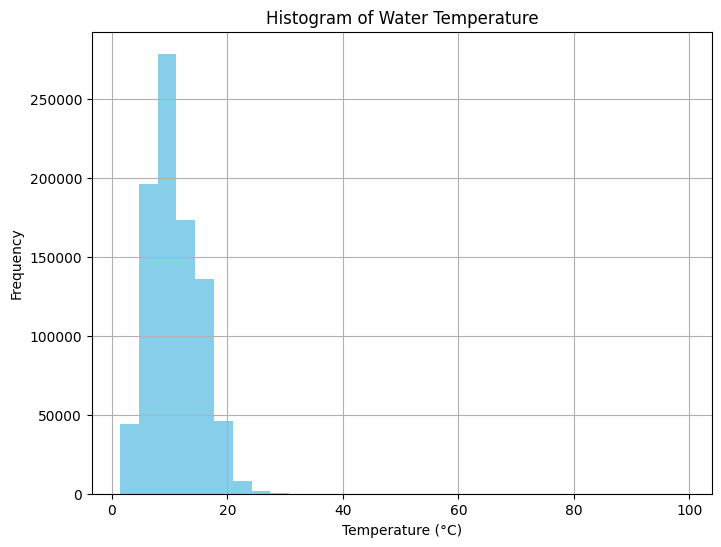

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Try reading the file with different encodings
possible_encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'utf-16']
file_path = '194903-202105_Bottle.csv'
data = None

for encoding in possible_encodings:
    try:
        data = pd.read_csv(file_path, encoding=encoding)
        break
    except UnicodeDecodeError:
        pass

if data is None:
    print("Unable to read the file with any of the specified encodings.")
else:
    # Removing missing values from the 'T_degC' column
    data.dropna(subset=['T_degC'], inplace=True)

    # Removing duplicates
    data.drop_duplicates(inplace=True)
    # Select the column for Temperature of Water
    temperature_data = data['T_degC']

    # Plotting the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(temperature_data, bins=30, color='skyblue')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Water Temperature')
    plt.grid(True)
    plt.show()

# Question 2

<Figure size 800x600 with 0 Axes>

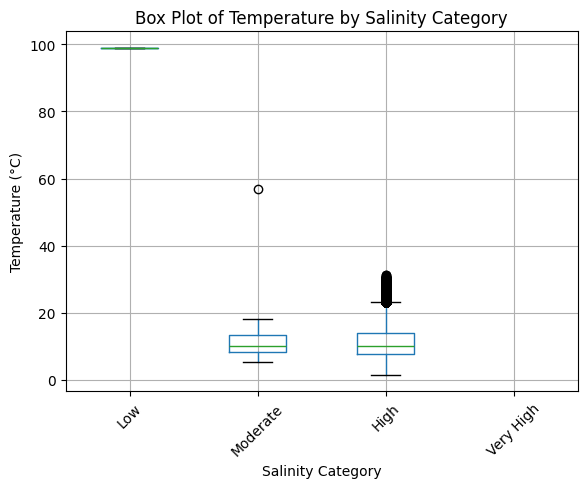

In [11]:
# Let's define bins for salinity ranges
salinity_bins = [0, 20, 30, 40, 50]  # Define your own bins here based on your data

# Create labels for the salinity ranges
salinity_labels = ['Low', 'Moderate', 'High', 'Very High']

# Create a new categorical variable based on salinity ranges
data['Salinity_Category'] = pd.cut(data['Salnty'], bins=salinity_bins, labels=salinity_labels)

# Selecting response and explanatory variables
response_variable = 'T_degC'  # Temperature of Water
explanatory_variable = 'Salinity_Category'

# Plotting the box plot
plt.figure(figsize=(8, 6))
data.boxplot(column=response_variable, by=explanatory_variable)
plt.xlabel('Salinity Category')
plt.ylabel('Temperature (°C)')
plt.title('Box Plot of Temperature by Salinity Category')
plt.suptitle('')  # Removing default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)
plt.show()

# Question 3

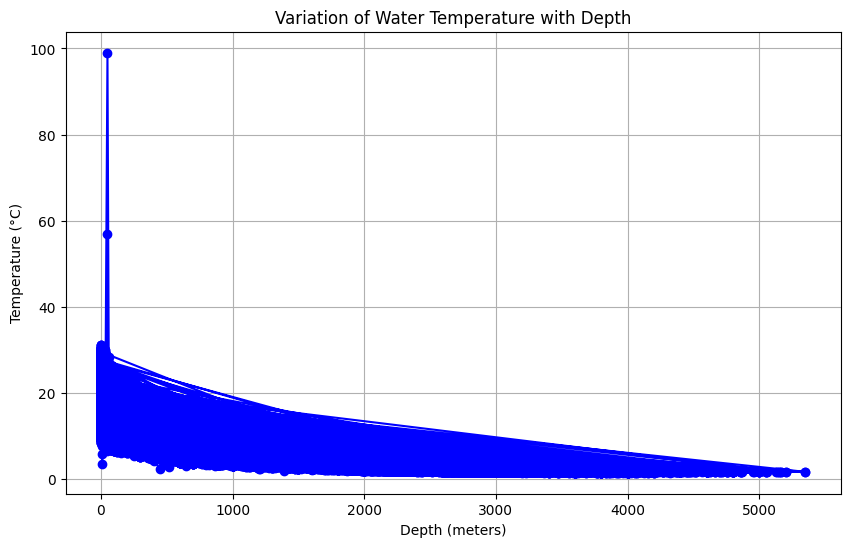

In [18]:
# Selecting Depthm and T_degC columns
depth = data['Depthm']
temperature = data['T_degC']

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(depth, temperature, marker='o', linestyle='-', color='blue')
plt.xlabel('Depth (meters)')
plt.ylabel('Temperature (°C)')
plt.title('Variation of Water Temperature with Depth')
plt.grid(True)
plt.show()


# Question 4

C:\Users\benedict.omusi\env\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


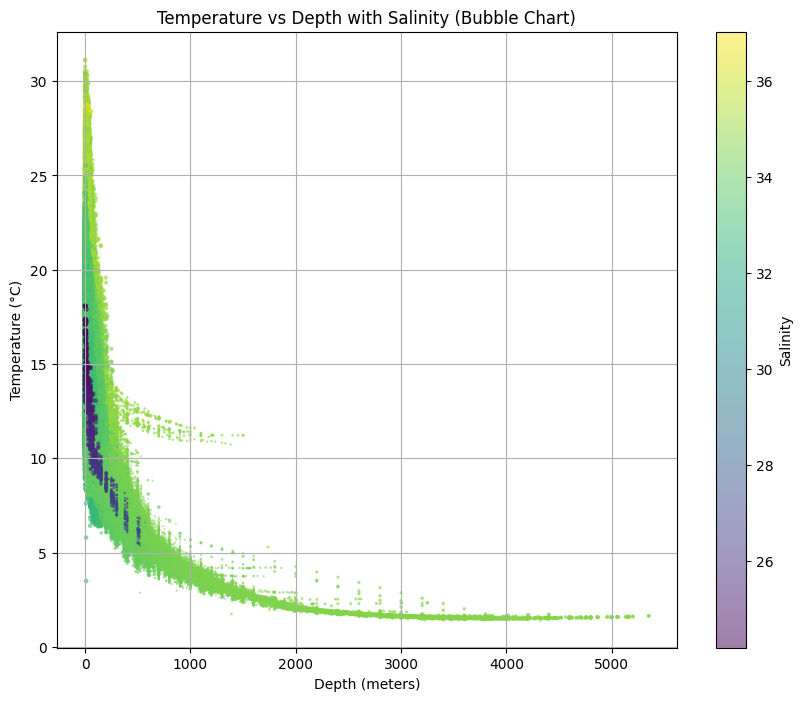

In [16]:
# Selecting Depthm, T_degC, and Salnty columns
depth = data['Depthm']
temperature = data['T_degC']
salinity = data['Salnty']

# Setting bubble sizes based on a fourth variable (optional)
# For example, using 'O2ml_L' (Oxygen in mL/L) for bubble sizes
bubble_sizes = data['O2ml_L']  # You can replace this with any other relevant variable

# Plotting the bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(depth, temperature, s=bubble_sizes, c=salinity, alpha=0.5, cmap='viridis')
plt.xlabel('Depth (meters)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Depth with Salinity (Bubble Chart)')
plt.colorbar(label='Salinity')
plt.grid(True)
plt.show()

# Question 5

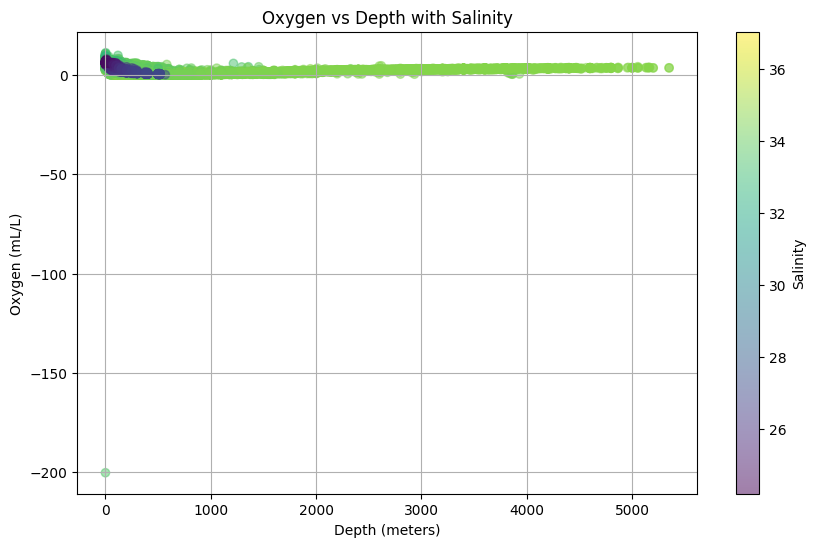

In [17]:
# Selecting Depthm, O2ml_L, and Salnty columns
depth = data['Depthm']
oxygen = data['O2ml_L']
salinity = data['Salnty']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(depth, oxygen, c=salinity, cmap='viridis', alpha=0.5)
plt.colorbar(label='Salinity')
plt.xlabel('Depth (meters)')
plt.ylabel('Oxygen (mL/L)')
plt.title('Oxygen vs Depth with Salinity')
plt.grid(True)
plt.show()
